## Import Packages

In [5]:
import pathlib 
from glob import glob 
import PIL

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import tensorflow as tf 

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Import Dataset

In [13]:
data_local_dir = '../../train_data'    #rename to where data is located on your local machine 
data_dir = pathlib.Path(data_local_dir) 

In [14]:
normal_xray = list(data_dir.glob('NORMAL/*.jpeg'))
pneum_xray = list(data_dir.glob('PNEUMONIA/*.jpeg'))

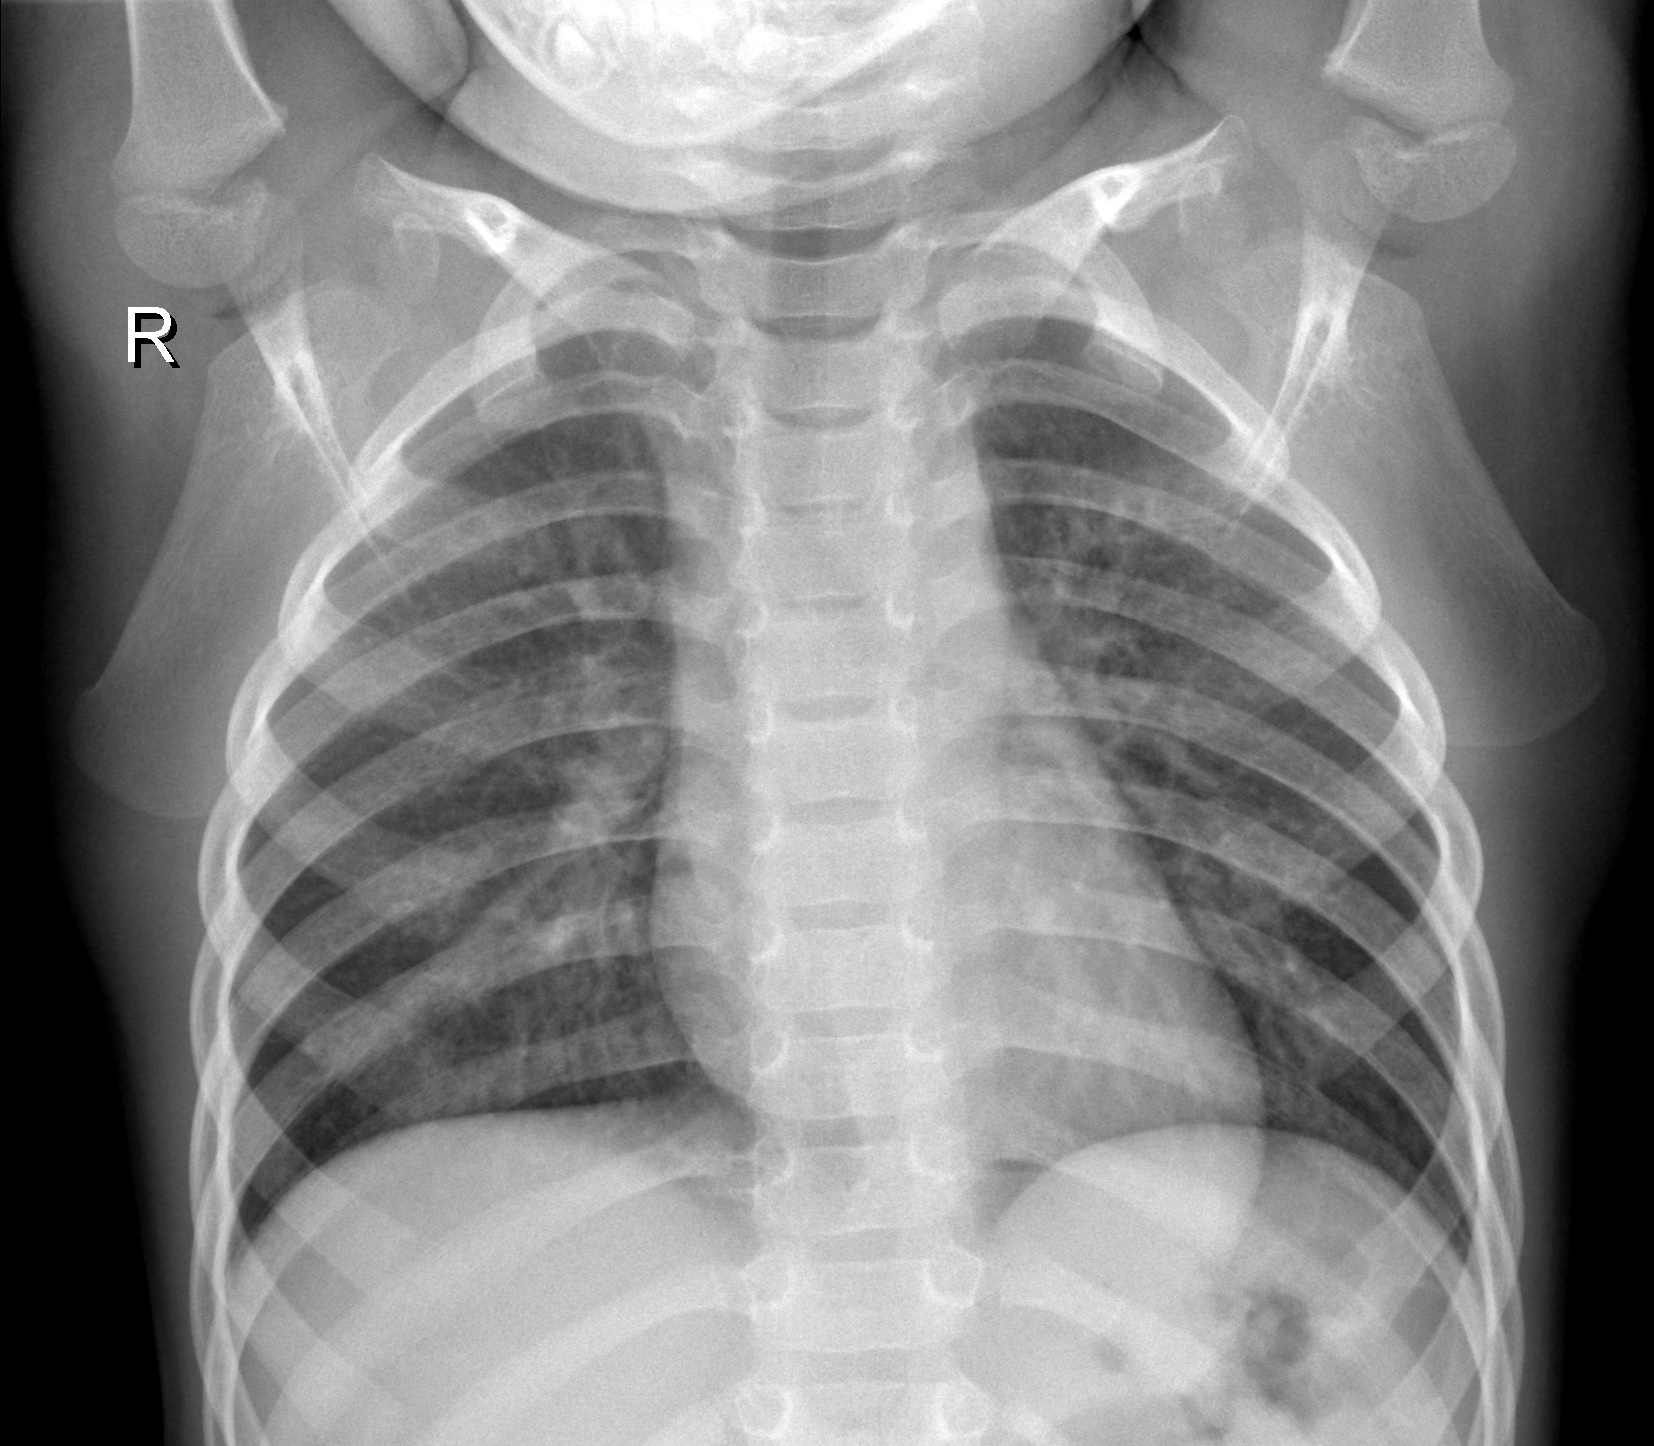

In [15]:
normal_im = PIL.Image.open(str(normal_xray[0]))
normal_im

In [16]:
normal_im.size

(1654, 1446)

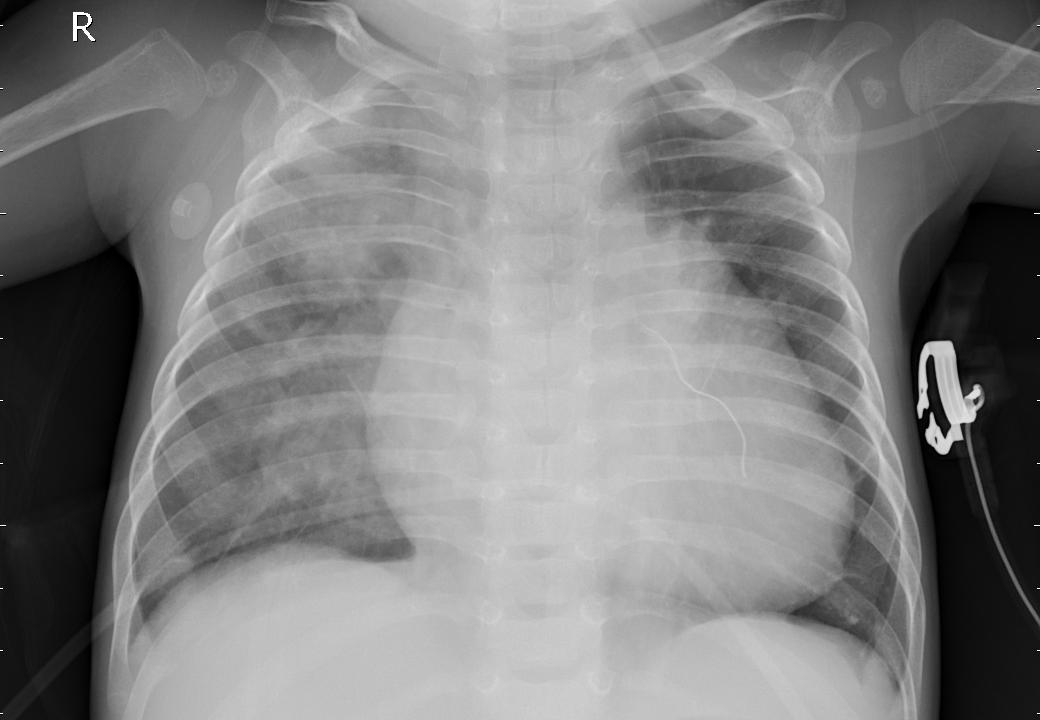

In [17]:
pneum_im = PIL.Image.open(str(pneum_xray[0]))
pneum_im

In [18]:
pneum_im.size

(1040, 720)

In [19]:
pneum_im2 = PIL.Image.open(str(pneum_xray[1]))
pneum_im2.size

(1128, 640)

The images have all different sizes, so the image sizes will have to be standardized. 

In [20]:
data = []
for pic in (normal_xray + pneum_xray):
    with PIL.Image.open(pic) as img:
        width, height = img.size
        asp_ratio = width/height
        data.append([pic, width, height, asp_ratio])

img_df = pd.DataFrame(data, columns = ['path','width', 'height', 'aspect ratio'])
img_df

path  width  height  \
0      ../../train_data/NORMAL/NORMAL-2552119-0002.jpeg   1654    1446   
1      ../../train_data/NORMAL/NORMAL-7298141-0001.jpeg   1674    1144   
2      ../../train_data/NORMAL/NORMAL-3411116-0002.jpeg   1414    1164   
3      ../../train_data/NORMAL/NORMAL-1619233-0001.jpeg   1288    1008   
4      ../../train_data/NORMAL/NORMAL-7327513-0001.jpeg   1850    1746   
...                                                 ...    ...     ...   
5227  ../../train_data/PNEUMONIA/BACTERIA-3395038-00...   1904    1744   
5228  ../../train_data/PNEUMONIA/BACTERIA-6952717-00...   1392     824   
5229  ../../train_data/PNEUMONIA/VIRUS-463487-0002.jpeg   1352    1080   
5230  ../../train_data/PNEUMONIA/BACTERIA-4343805-00...   1048     856   
5231  ../../train_data/PNEUMONIA/BACTERIA-1369326-00...    992     736   

      aspect ratio  
0         1.143845  
1         1.463287  
2         1.214777  
3         1.277778  
4         1.059565  
...            ...  
5227      1.091743  
5228      1.689320  
5229      1.251852  
5230      1.224299  
5231      1.347826  

[5232 rows x 4 columns]

<AxesSubplot:>

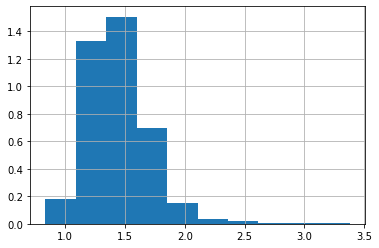

In [21]:
img_df['aspect ratio'].hist(density = True)

In [22]:
img_df.describe()

width       height  aspect ratio
count  5232.000000  5232.000000   5232.000000
mean   1320.695336   968.181384      1.440047
std     355.024600   378.542729      0.257115
min     384.000000   127.000000      0.835391
25%    1056.000000   688.000000      1.257206
50%    1284.000000   888.000000      1.411426
75%    1552.000000  1187.750000      1.583333
max    2916.000000  2663.000000      3.378788

In [23]:
img_df[img_df['width'] == 384]

path  width  height  \
4912  ../../train_data/PNEUMONIA/VIRUS-355597-0002.jpeg    384     127   

      aspect ratio  
4912      3.023622

Resize to smallest size with aspect ratio of 1.45 

In [24]:
350/1.45

241.3793103448276

In [25]:
img_width = 350 
img_height = 240

## Create Dataset

In [99]:
batch_size = 32
img_height = 240
img_width = 350

In [100]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed = 27,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5232 files belonging to 2 classes.
Using 3663 files for training.


In [101]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed = 27,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5232 files belonging to 2 classes.
Using 1569 files for validation.


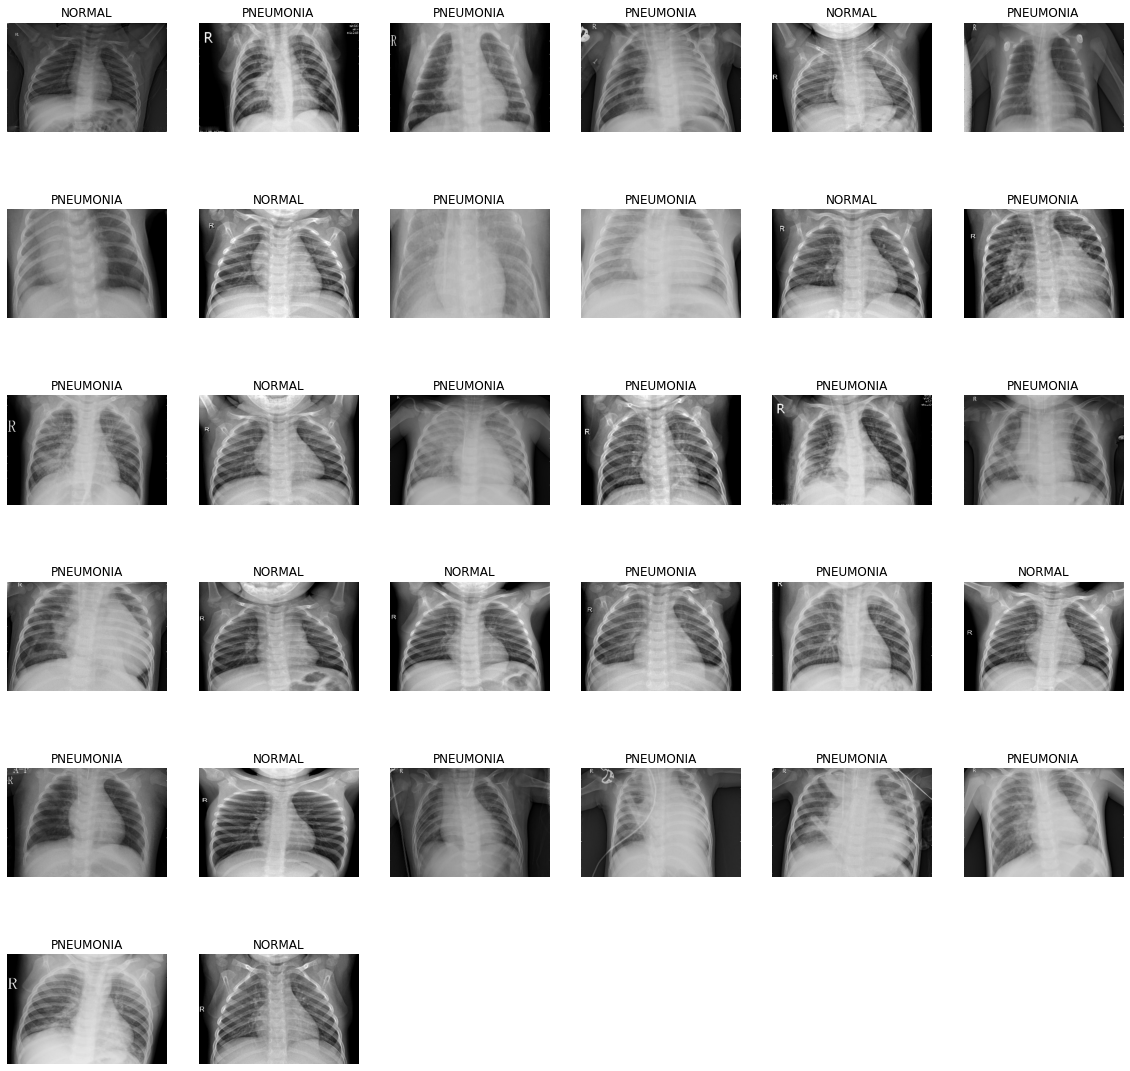

In [102]:
plt.figure(figsize=(20, 20))
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [103]:
image_batch, labels_batch = next(iter(train_ds))
print(image_batch.shape)
print(labels_batch.shape)

(32, 240, 350, 3)
(32,)


In [368]:
class_names

['NORMAL', 'PNEUMONIA']

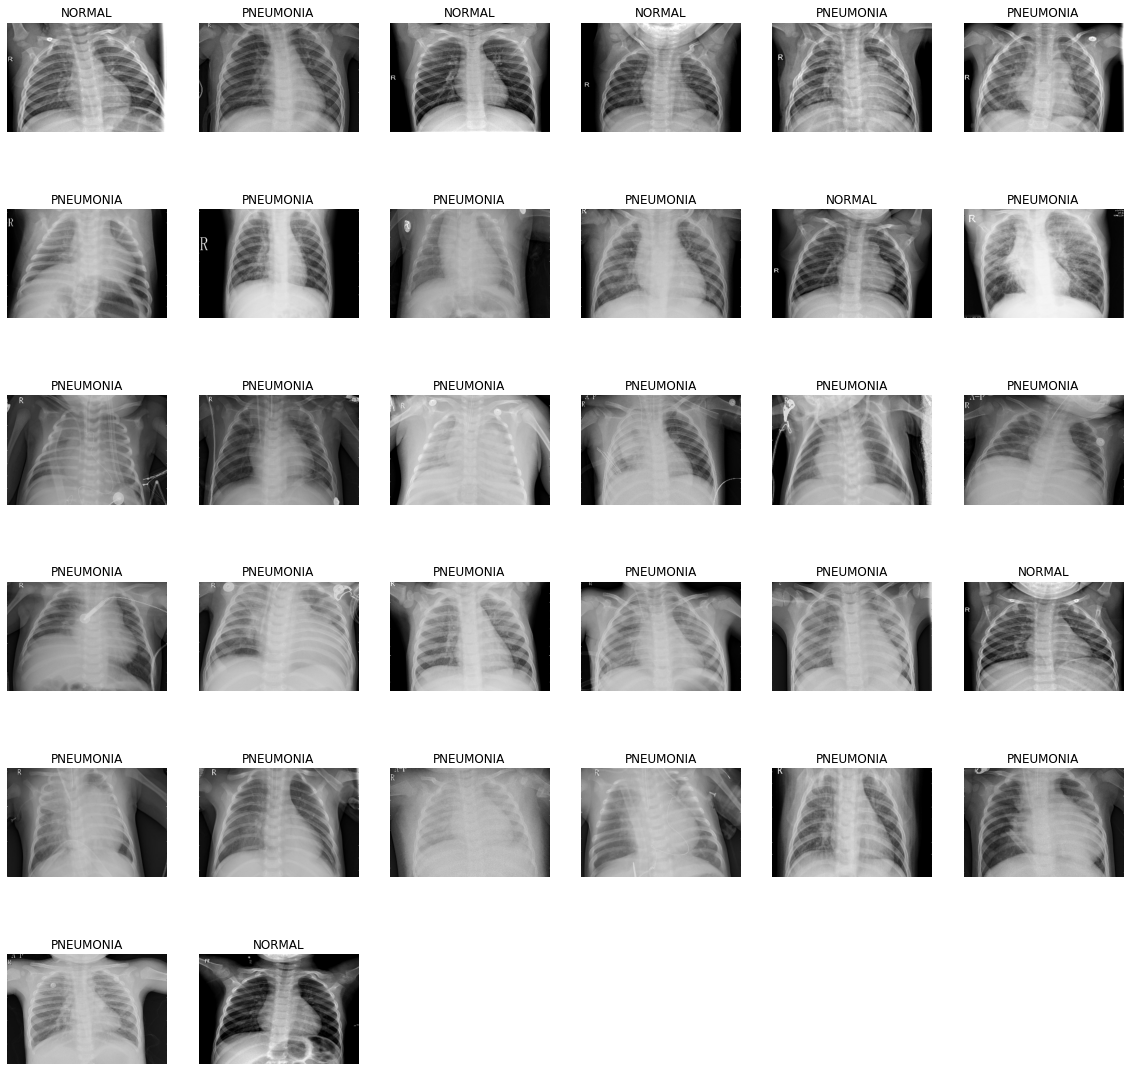

In [104]:
plt.figure(figsize=(20, 20))
class_names = test_ds.class_names
for images, labels in test_ds.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [105]:
image_batch, labels_batch = next(iter(test_ds))
print(image_batch.shape)
print(labels_batch.shape)

(32, 240, 350, 3)
(32,)


In [54]:
train_ds_gray = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed = 27,
  image_size=(img_height, img_width),
  batch_size=batch_size,
    color_mode = "grayscale", shuffle = True)

Found 5232 files belonging to 2 classes.
Using 3663 files for training.


In [42]:
image_batch, labels_batch = next(iter(train_ds_gray))
print(image_batch.shape)
print(labels_batch.shape)

(32, 240, 350, 1)
(32,)


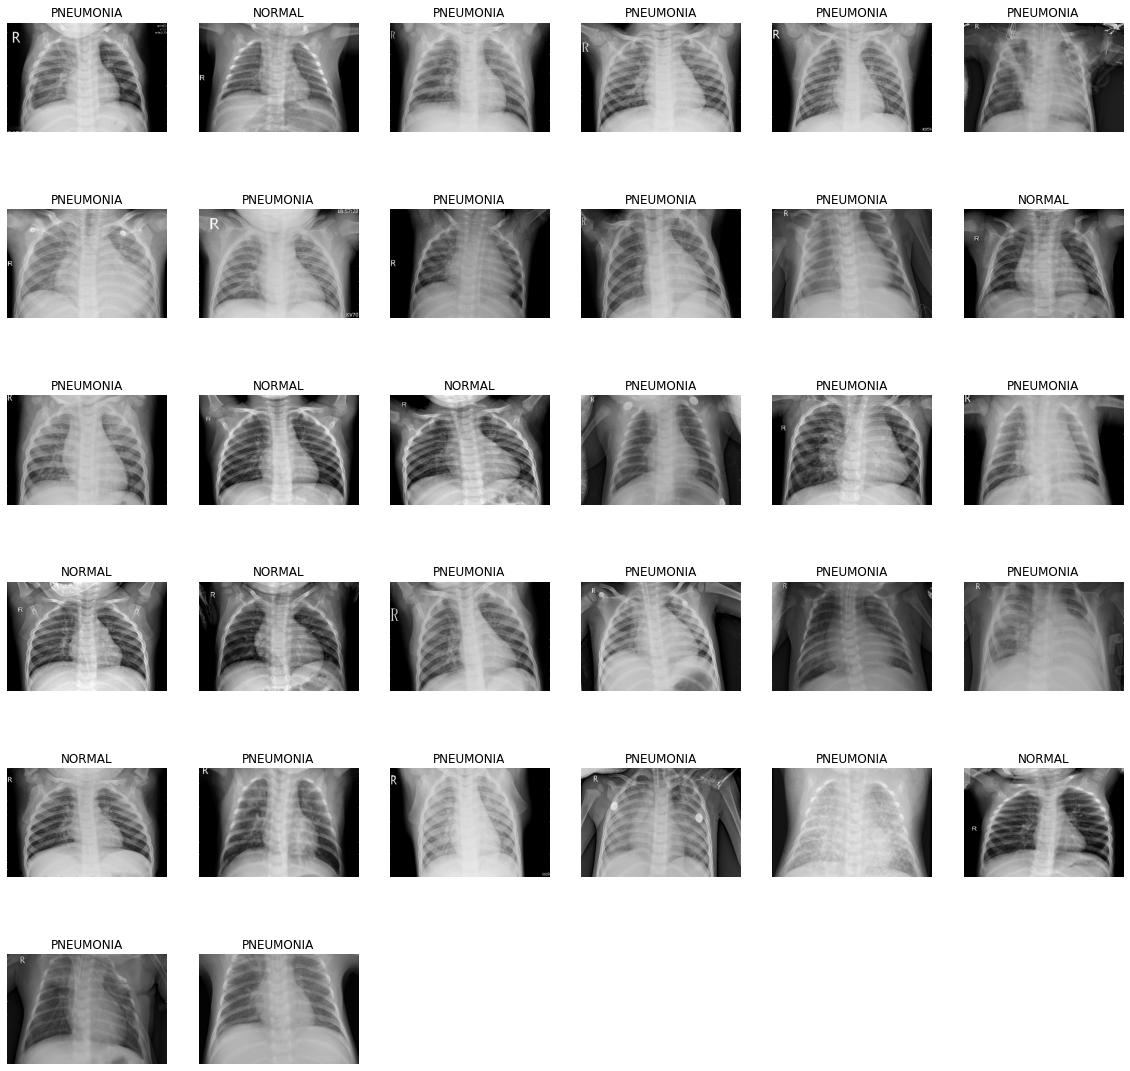

In [43]:
plt.figure(figsize=(20, 20))
class_names = train_ds_gray.class_names
for images, labels in train_ds.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [44]:
test_ds_gray = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed = 27,
  image_size=(img_height, img_width),
  batch_size=batch_size,
    color_mode = "grayscale", shuffle = True)

Found 5232 files belonging to 2 classes.
Using 1569 files for validation.


In [46]:
image_batch, labels_batch = next(iter(test_ds_gray))
print(image_batch.shape)
print(labels_batch.shape)

(32, 240, 350, 1)
(32,)


In [47]:
tf.keras.backend.clear_session()

In [113]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [114]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [115]:
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(image_batch.shape)
print(labels_batch.shape)
print(np.min(first_image), np.max(first_image))

(32, 240, 350, 3)
(32,)
0.0 0.9982523


## CNN Model

### Basic Model

In [60]:
num_classes = len(class_names)

basic_model1_bin = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')   #for binary classification 
])

In [61]:
basic_model1_bin.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                    metrics=['accuracy'])

In [62]:
basic_model1_bin.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 240, 350, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 240, 350, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 175, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 175, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 87, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 87, 64)        1

In [63]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

earlystopping = EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
checkpoint = ModelCheckpoint(filepath='/tmp/checkpoint', verbose=1, save_best_only=True)
logger_bm1 = CSVLogger('log_basic_model1.csv', append=True, separator=' ')

In [75]:
basic_model1_bin_fit = basic_model1_bin.fit(
    train_ds,
    validation_data=test_ds,
    epochs=25, 
    callbacks =[earlystopping, checkpoint, logger_bm1]
)

Epoch 1/25
115/115 [==============================] - ETA: 0s - loss: 0.0658 - accuracy: 0.9773
Epoch 1: val_loss improved from 0.08836 to 0.07910, saving model to /tmp/checkpoint


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


115/115 [==============================] - 99s 863ms/step - loss: 0.0658 - accuracy: 0.9773 - val_loss: 0.0791 - val_accuracy: 0.9713
Epoch 2/25
115/115 [==============================] - ETA: 0s - loss: 0.0628 - accuracy: 0.9776
Epoch 2: val_loss improved from 0.07910 to 0.07701, saving model to /tmp/checkpoint


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


115/115 [==============================] - 101s 876ms/step - loss: 0.0628 - accuracy: 0.9776 - val_loss: 0.0770 - val_accuracy: 0.9720
Epoch 3/25
115/115 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 0.9803
Epoch 3: val_loss did not improve from 0.07701
115/115 [==============================] - 95s 825ms/step - loss: 0.0581 - accuracy: 0.9803 - val_loss: 0.0786 - val_accuracy: 0.9700
Epoch 4/25
115/115 [==============================] - ETA: 0s - loss: 0.0563 - accuracy: 0.9798
Epoch 4: val_loss improved from 0.07701 to 0.07665, saving model to /tmp/checkpoint


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


115/115 [==============================] - 100s 866ms/step - loss: 0.0563 - accuracy: 0.9798 - val_loss: 0.0766 - val_accuracy: 0.9707
Epoch 5/25
115/115 [==============================] - ETA: 0s - loss: 0.0557 - accuracy: 0.9801
Epoch 5: val_loss improved from 0.07665 to 0.07404, saving model to /tmp/checkpoint


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


115/115 [==============================] - 104s 904ms/step - loss: 0.0557 - accuracy: 0.9801 - val_loss: 0.0740 - val_accuracy: 0.9726
Epoch 6/25
115/115 [==============================] - ETA: 0s - loss: 0.0565 - accuracy: 0.9801
Epoch 6: val_loss did not improve from 0.07404
115/115 [==============================] - 109s 949ms/step - loss: 0.0565 - accuracy: 0.9801 - val_loss: 0.0871 - val_accuracy: 0.9681
Epoch 7/25
115/115 [==============================] - ETA: 0s - loss: 0.0520 - accuracy: 0.9823
Epoch 7: val_loss did not improve from 0.07404
115/115 [==============================] - 107s 932ms/step - loss: 0.0520 - accuracy: 0.9823 - val_loss: 0.0746 - val_accuracy: 0.9720
Epoch 8/25
115/115 [==============================] - ETA: 0s - loss: 0.0494 - accuracy: 0.9831
Epoch 8: val_loss improved from 0.07404 to 0.07181, saving model to /tmp/checkpoint


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


115/115 [==============================] - 113s 983ms/step - loss: 0.0494 - accuracy: 0.9831 - val_loss: 0.0718 - val_accuracy: 0.9745
Epoch 9/25
115/115 [==============================] - ETA: 0s - loss: 0.0499 - accuracy: 0.9828
Epoch 9: val_loss improved from 0.07181 to 0.06830, saving model to /tmp/checkpoint


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


115/115 [==============================] - 112s 976ms/step - loss: 0.0499 - accuracy: 0.9828 - val_loss: 0.0683 - val_accuracy: 0.9764
Epoch 10/25
115/115 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9823
Epoch 10: val_loss did not improve from 0.06830
115/115 [==============================] - 101s 876ms/step - loss: 0.0493 - accuracy: 0.9823 - val_loss: 0.0751 - val_accuracy: 0.9713
Epoch 11/25
115/115 [==============================] - ETA: 0s - loss: 0.0451 - accuracy: 0.9836
Epoch 11: val_loss improved from 0.06830 to 0.06761, saving model to /tmp/checkpoint


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


115/115 [==============================] - 114s 997ms/step - loss: 0.0451 - accuracy: 0.9836 - val_loss: 0.0676 - val_accuracy: 0.9777
Epoch 12/25
115/115 [==============================] - ETA: 0s - loss: 0.0450 - accuracy: 0.9844
Epoch 12: val_loss improved from 0.06761 to 0.06690, saving model to /tmp/checkpoint


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


115/115 [==============================] - 107s 932ms/step - loss: 0.0450 - accuracy: 0.9844 - val_loss: 0.0669 - val_accuracy: 0.9777
Epoch 13/25
115/115 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9847
Epoch 13: val_loss did not improve from 0.06690
115/115 [==============================] - 102s 886ms/step - loss: 0.0432 - accuracy: 0.9847 - val_loss: 0.0676 - val_accuracy: 0.9783
Epoch 14/25
115/115 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9858
Epoch 14: val_loss did not improve from 0.06690
115/115 [==============================] - 110s 960ms/step - loss: 0.0417 - accuracy: 0.9858 - val_loss: 0.0782 - val_accuracy: 0.9751
Epoch 15/25
115/115 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9853
Epoch 15: val_loss improved from 0.06690 to 0.06614, saving model to /tmp/checkpoint


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


115/115 [==============================] - 112s 975ms/step - loss: 0.0430 - accuracy: 0.9853 - val_loss: 0.0661 - val_accuracy: 0.9790
Epoch 16/25
115/115 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9858
Epoch 16: val_loss improved from 0.06614 to 0.06569, saving model to /tmp/checkpoint


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


115/115 [==============================] - 108s 939ms/step - loss: 0.0413 - accuracy: 0.9858 - val_loss: 0.0657 - val_accuracy: 0.9777
Epoch 17/25
115/115 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9872
Epoch 17: val_loss did not improve from 0.06569
115/115 [==============================] - 108s 942ms/step - loss: 0.0390 - accuracy: 0.9872 - val_loss: 0.0824 - val_accuracy: 0.9700
Epoch 18/25
115/115 [==============================] - ETA: 0s - loss: 0.0407 - accuracy: 0.9828
Epoch 18: val_loss did not improve from 0.06569
115/115 [==============================] - 111s 964ms/step - loss: 0.0407 - accuracy: 0.9828 - val_loss: 0.0702 - val_accuracy: 0.9751
Epoch 19/25
115/115 [==============================] - ETA: 0s - loss: 0.0398 - accuracy: 0.9858
Epoch 19: val_loss improved from 0.06569 to 0.06513, saving model to /tmp/checkpoint


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


115/115 [==============================] - 101s 881ms/step - loss: 0.0398 - accuracy: 0.9858 - val_loss: 0.0651 - val_accuracy: 0.9809
Epoch 20/25
115/115 [==============================] - ETA: 0s - loss: 0.0355 - accuracy: 0.9885
Epoch 20: val_loss did not improve from 0.06513
115/115 [==============================] - 112s 975ms/step - loss: 0.0355 - accuracy: 0.9885 - val_loss: 0.0709 - val_accuracy: 0.9732
Epoch 21/25
115/115 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.9880
Epoch 21: val_loss did not improve from 0.06513
115/115 [==============================] - 116s 1s/step - loss: 0.0366 - accuracy: 0.9880 - val_loss: 0.0691 - val_accuracy: 0.9751
Epoch 22/25
115/115 [==============================] - ETA: 0s - loss: 0.0349 - accuracy: 0.9899
Epoch 22: val_loss did not improve from 0.06513
115/115 [==============================] - 110s 960ms/step - loss: 0.0349 - accuracy: 0.9899 - val_loss: 0.0658 - val_accuracy: 0.9809
Epoch 23/25
115/115 [=======

INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


115/115 [==============================] - 109s 951ms/step - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0647 - val_accuracy: 0.9796
Epoch 25/25
115/115 [==============================] - ETA: 0s - loss: 0.0333 - accuracy: 0.9891
Epoch 25: val_loss improved from 0.06473 to 0.06414, saving model to /tmp/checkpoint


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


INFO:tensorflow:Assets written to: /tmp/checkpoint/assets


115/115 [==============================] - 122s 1s/step - loss: 0.0333 - accuracy: 0.9891 - val_loss: 0.0641 - val_accuracy: 0.9828


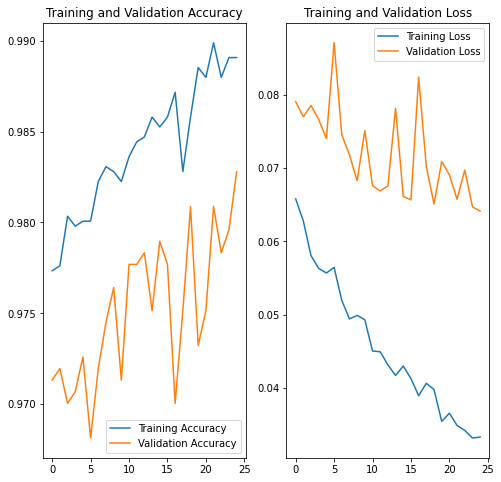

In [78]:
acc_bm1 = basic_model1_bin_fit.history['accuracy']
val_acc_bm1 = basic_model1_bin_fit.history['val_accuracy']

loss_bm1 = basic_model1_bin_fit.history['loss']
val_loss_bm1 = basic_model1_bin_fit.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_bm1, label='Training Accuracy')
plt.plot(epochs_range, val_acc_bm1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_bm1, label='Training Loss')
plt.plot(epochs_range, val_loss_bm1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [131]:
bm1_pred = basic_model1_bin.predict(test_ds)
bm1_pred_50 = (bm1_pred > 0.5).astype(np.float32)
bm1_pred_75 = (bm1_pred > 0.75).astype(np.float32)
true_categories = tf.concat([y for x, y in test_ds], axis=0)

50/50 [==============================] - 11s 216ms/step


(array([ 347.,   19.,   13.,    8.,   10.,    9.,    7.,   11.,   28.,
        1117.]),
 array([1.13062415e-05, 1.00010179e-01, 2.00009048e-01, 3.00007910e-01,
        4.00006771e-01, 5.00005662e-01, 6.00004494e-01, 7.00003386e-01,
        8.00002277e-01, 9.00001109e-01, 1.00000000e+00], dtype=float32),
 <BarContainer object of 10 artists>)

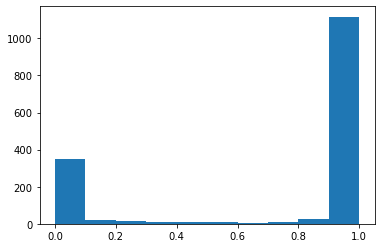

In [186]:
plt.hist(np.ndarray.flatten(bm1_pred))

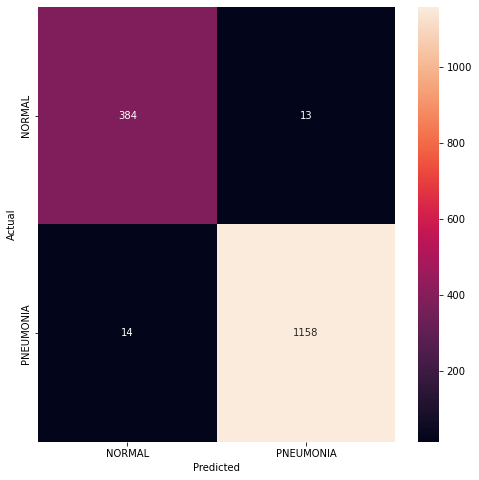

In [172]:
cm = confusion_matrix(bm1_pred_50, true_categories)
plt.figure(figsize=(8,8))
ax= plt.subplot()
sns_hmp = sns.heatmap(cm, annot=True, xticklabels = [class_names[i] for i in range(len(class_names))], 
                      yticklabels = [class_names[i] for i in range(len(class_names))], fmt="d")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
fig = sns_hmp.get_figure()

In [173]:
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN = cm[0,0]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("True Positive Rate: ", TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("True Negative Rate", TNR)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate: ", FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate: ", FNR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy: ", ACC)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision: ", PPV)
# False discovery rate
FDR = FP/(TP+FP)
print("False Discovery Rate: ", FNR)
# Negative predictive value
NPV = TN/(TN+FN)
print("Negative Predictive: ", NPV)


True Positive Rate:  0.9880546075085325
True Negative Rate 0.9672544080604534
False Positive Rate:  0.0327455919395466
False Negative Rate:  0.011945392491467578
Accuracy:  0.982791586998088
Precision:  0.9888983774551665
False Discovery Rate:  0.011945392491467578
Negative Predictive:  0.964824120603015


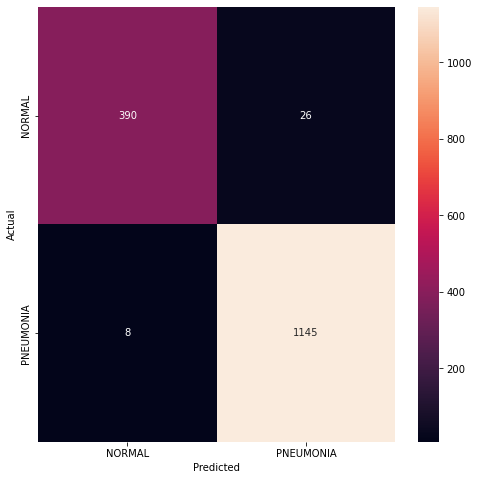

In [141]:
cm = confusion_matrix(bm1_pred_75, true_categories)
plt.figure(figsize=(8,8))
ax= plt.subplot()
sns_hmp = sns.heatmap(cm, annot=True, xticklabels = [class_names[i] for i in range(len(class_names))], 
                      yticklabels = [class_names[i] for i in range(len(class_names))], fmt="d")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
fig = sns_hmp.get_figure()

In [171]:
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN = cm[0,0]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("True Positive Rate: ", TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("True Negative Rate", TNR)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate: ", FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate: ", FNR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy: ", ACC)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision: ", PPV)
# False discovery rate
FDR = FP/(TP+FP)
print("False Discovery Rate: ", FNR)
# Negative predictive value
NPV = TN/(TN+FN)
print("Negative Predictive: ", NPV)

True Positive Rate:  0.9930615784908933
True Negative Rate 0.9375
False Positive Rate:  0.0625
False Negative Rate:  0.006938421509106678
Accuracy:  0.9783301465901848
Precision:  0.977796754910333
False Discovery Rate:  0.006938421509106678
Negative Predictive:  0.9798994974874372


### Basic Model 2 

In [297]:
tf.keras.backend.clear_session()

In [349]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [350]:
num_classes = len(class_names)

basic_model2 = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                             kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation="sigmoid") 
])

In [351]:
basic_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 240, 350, 3)       0         
                                                                 
 sequential (Sequential)     (None, 240, 350, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 240, 350, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 175, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 175, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 87, 32)       0         
 2D)                                                  

In [362]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

earlystopping = EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)
checkpoint = ModelCheckpoint(filepath='/tmp/checkpoint', verbose=1, save_best_only=True)
logger_bm1 = CSVLogger('log_basic_model2.csv', append=True, separator=' ')

In [353]:
class CustomLearningRateScheduler(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.metrics={'loss': [],'accuracy': [],'val_loss': [],'val_accuracy': []}
        self.lr=[]
    def on_epoch_end(self, epoch, logs={}):     
        print(f"\nEPOCH {epoch} Callng from METRICS CLASS")
        self.metrics['loss'].append(logs.get('loss'))
        self.metrics['accuracy'].append(logs.get('accuracy'))
        self.metrics['val_loss'].append(logs.get('val_loss'))
        self.metrics['val_accuracy'].append(logs.get('val_accuracy'))

In [358]:
from tensorflow.keras.callbacks import LearningRateScheduler
def changeLearningRate(epoch, lr):
    print(f"EPOCH {epoch},  Calling from ChangeLearningRate: {custom_metrics_dict.metrics['accuracy']}")
    if epoch > 1:
        if custom_metrics_dict.metrics['accuracy'][epoch - 1] > custom_metrics_dict.metrics['accuracy'][epoch-2]:    
            print(f"Accuracy @ epoch {epoch} is less than acuracy at epoch {epoch-1}")
            print("[INFO] Decreasing Learning Rate.....")
            lr = lr*(0.01)
            print(f"LR Changed to {lr}")  
    return lr

In [359]:
custom_metrics_dict=CustomLearningRateScheduler()
lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)

In [360]:
basic_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                    metrics=['accuracy', 'AUC'])

In [364]:
basic_model2_fit = basic_model2.fit(
    train_ds,
    validation_data=test_ds,
    epochs=100, 
    callbacks = [earlystopping, checkpoint, custom_metrics_dict, lrschedule, logger_bm1]

)

EPOCH 0,  Calling from ChangeLearningRate: []

Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/100
115/115 [==============================] - ETA: 0s - loss: 0.5731 - accuracy: 0.7404 - auc: 0.4908
Epoch 1: val_loss did not improve from 0.56633

EPOCH 0 Callng from METRICS CLASS
115/115 [==============================] - 111s 968ms/step - loss: 0.5731 - accuracy: 0.7404 - auc: 0.4908 - val_loss: 0.5665 - val_accuracy: 0.7463 - val_auc: 0.4996 - lr: 0.0100
EPOCH 1,  Calling from ChangeLearningRate: [0.7403767108917236]

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/100
115/115 [==============================] - ETA: 0s - loss: 0.5729 - accuracy: 0.7404 - auc: 0.4946
Epoch 2: val_loss did not improve from 0.56633

EPOCH 1 Callng from METRICS CLASS
115/115 [==============================] - 111s 961ms/step - loss: 0.5729 - accuracy: 0.7404 - auc: 0.4946 - val_loss: 0.5663 - val_accuracy: 0.7463 - val_auc: 0.4996

In [348]:
acc_bm2 = basic_model2_fit.history['accuracy']
val_acc_bm2 = basic_model2_fit.history['val_accuracy']

loss_bm2 = basic_model2_fit.history['loss']
val_loss_bm2 = basic_model2_fit.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_bm2, label='Training Accuracy')
plt.plot(epochs_range, val_acc_bm2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_bm2, label='Training Loss')
plt.plot(epochs_range, val_loss_bm2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
bm2_pred = basic_model2.predict(test_ds)
bm2_pred_50 = (bm2_pred > 0.5).astype(np.float32)
bm2_pred_75 = (bm2_pred > 0.75).astype(np.float32)
true_categories = tf.concat([y for x, y in test_ds], axis=0)

In [ ]:
plt.hist(np.ndarray.flatten(bm2_pred))

In [ ]:
cm = confusion_matrix(bm2_pred_50, true_categories)
plt.figure(figsize=(8,8))
ax= plt.subplot()
sns_hmp = sns.heatmap(cm, annot=True, xticklabels = [class_names[i] for i in range(len(class_names))], 
                      yticklabels = [class_names[i] for i in range(len(class_names))], fmt="d")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
fig = sns_hmp.get_figure()

In [ ]:
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN = cm[0,0]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("True Positive Rate: ", TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("True Negative Rate", TNR)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate: ", FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate: ", FNR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy: ", ACC)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision: ", PPV)
# False discovery rate
FDR = FP/(TP+FP)
print("False Discovery Rate: ", FNR)
# Negative predictive value
NPV = TN/(TN+FN)
print("Negative Predictive: ", NPV)

In [ ]:
cm = confusion_matrix(bm2_pred_75, true_categories)
plt.figure(figsize=(8,8))
ax= plt.subplot()
sns_hmp = sns.heatmap(cm, annot=True, xticklabels = [class_names[i] for i in range(len(class_names))], 
                      yticklabels = [class_names[i] for i in range(len(class_names))], fmt="d")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
fig = sns_hmp.get_figure()

In [ ]:
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN = cm[0,0]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("True Positive Rate: ", TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("True Negative Rate", TNR)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate: ", FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate: ", FNR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy: ", ACC)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision: ", PPV)
# False discovery rate
FDR = FP/(TP+FP)
print("False Discovery Rate: ", FNR)
# Negative predictive value
NPV = TN/(TN+FN)
print("Negative Predictive: ", NPV)

### ResNet